#  🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce



##### **PROJECT TYPE** : EDA/CLUSTERING/RECOMMENDATION SYSTEM
##### **CONTRIBUTION** : INDIVIDUAL
##### **NAME** : ABISHEK K
#####  **BATCH** : JULY 15
##### **PROJECT NUMBER** : 02

# PROJECT SUMMARY

This project focuses on analyzing an online retail dataset to gain insights into customer behavior, segment customers, and build a product recommendation system. The analysis is divided into several stages, starting with data loading and cleaning, followed by exploratory data analysis (EDA), and finally, customer segmentation using RFM analysis and KMeans clustering. The project culminates in a Streamlit application that provides both product recommendations and customer segmentation.

**Data Loading and Cleaning:**

The project begins by loading the "online_retail.csv" dataset.
Data cleaning involves handling missing values by dropping rows with missing customer_id and description.
Canceled invoices (those starting with 'C') are removed from the dataset.
Duplicate values are inspected and determined to be valid transactions rather than errors.
Data with zero unit_price or quantity is removed.
Non-product entries and gift vouchers are filtered out.
Data types are corrected, with invoice_date converted to datetime objects, and customer_id and invoice_num converted to integers.

**Exploratory Data Analysis (EDA):**

The transaction volume by country is analyzed, revealing that the UK has the highest number of transactions.
Top-selling products are identified based on the total quantity sold.
The top countries by total sales are visualized.
A time-series analysis of monthly sales shows the purchasing trends over time.

**Customer Segmentation (RFM Analysis and Clustering):**

Recency, Frequency, and Monetary (RFM) values are calculated for each customer.
The RFM values are then scaled using StandardScaler.
The Elbow method and Silhouette Score are used to determine the optimal number of clusters for KMeans, which is found to be 3.
Customers are segmented into three clusters using KMeans clustering: 'Potential Loyalists', 'At Risk', and 'VIP'.
The trained KMeans model, scaler, and cluster mapping are saved for use in the Streamlit application.

**Streamlit Application:**

A Streamlit application has been developed to operationalize the project's findings.
**The application has two main modules:**
Product Recommendation: This module provides product recommendations to users, likely using a collaborative filtering approach.
Customer Segmentation: This module allows for the segmentation of customers based on the trained KMeans model. Users can likely input customer data or view the segments of existing customers.
This comprehensive project successfully moves from data analysis to a practical application, providing valuable tools for understanding and engaging with customers in an e-commerce setting.



# GITHUB LINK

https://github.com/abishekraj0908/E-Commerce-Store-Analysis-and-Recommendation-System

## PROBLEM STATEMENT

### To perform analysis on E-Commerce store's transaction data to uncover,

* Pattern in customer purchase behaviour.
* Segment customers based on Recency, Frequency and Monetary(RFM) analysis.
* Build a recommendation system using collaborative filtering technique.





# STAGE 1: DATA LOADING AND INSPECTION

In [1]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# loading the dataset
try:
  df = pd.read_csv("online_retail.csv")
except Exception as e:
  print(f"There's an error while loading the dataset {e}")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# checking the number of rows and columns in the dataset
try:
    print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")
except Exception as e:
  print(f"There's an error while checking the number of rows and columns {e}")

the dataset has 541909 rows and 8 columns


In [4]:
# basic information about the dataset
try:
  df.info()
except Exception as e:
  print(f"There's an error while checking the basic information about the dataset {e}")

# renaming the columns in the dataset
try:
  df.rename(columns = {"InvoiceNo":"invoice_num","StockCode":"stock_code","Description":"description","Quantity":"quantity","InvoiceDate":"invoice_date","UnitPrice":"unit_price","CustomerID":"customer_id","Country":"country"},inplace = True)
  print(df.columns)
except Exception as e:
  print(f"There's an error while renaming the columns in the dataset {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')


In [5]:
# missing values inspection
try:
  for i in df.columns:
    print(f"column {i} has {df[i].isnull().sum()} missing values")
except Exception as e:
  print(f"There's an error while checking the missing values {e}\n")

# percentage of missing values
print('------------------------------------------------------')
try:
  print(f"\ncolumn description has {round(df['description'].isnull().sum()/df.shape[0]*100,2)}% missing values")
  print(f"column customer_id has {round(df['customer_id'].isnull().sum()/df.shape[0]*100,2)}% missing values")
except Exception as e:
  print(f"There's an error while checking the percentage of missing values {e}")


column invoice_num has 0 missing values
column stock_code has 0 missing values
column description has 1454 missing values
column quantity has 0 missing values
column invoice_date has 0 missing values
column unit_price has 0 missing values
column customer_id has 135080 missing values
column country has 0 missing values
------------------------------------------------------

column description has 0.27% missing values
column customer_id has 24.93% missing values


# STAGE 2:  DATA CLEANING

In [6]:
# Since customer_id is a crucial column in segmenting customers and also for building recommendation system, removing them early is good
try:
  df.dropna(subset = ['customer_id','description'],inplace = True)
except Exception as e:
  print(f"There's an error while dropping the missing values {e}")
print(df['customer_id'].isnull().sum())
print(df['description'].isnull().sum())
print(df.shape)

0
0
(406829, 8)


In [7]:
# removing cancelled invoice rows
try:
  df = df[~df['invoice_num'].str.startswith('C')]
except Exception as e:
  print(f"There's an error while removing the cancelled invoice rows {e}")
print(df.shape)

(397924, 8)


In [8]:
# Duplicate values inspection
df[df.duplicated()].head(50)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2022-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2022-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2022-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2022-12-01 11:49:00,3.75,17920.0,United Kingdom


### By observing the so called duplicates from this dataset, it seems that those were not actually duplicates and they are actually different products ordered by same customer from same country in same order. So no need to remove them by considering them as duplicates!

In [9]:
# Describing the dataset to get the statistical idea
df.describe()

,quantity,unit_price,customer_id
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
# Removing skewed data points in unit_price and quantity column
df = df[(df['unit_price'] > 0) & (df['quantity'] > 0)].copy()
print(df.shape)

(397884, 8)


In [11]:
# Removing non-product entries
non_products = ['POST', 'D', 'M', 'AMAZONFEE', 'S', 'B', 'C2', 'CRUK']
df = df[~df['stock_code'].isin(non_products)].copy()
# Removing gift vouchers from stock_code
df = df[~df['stock_code'].str.startswith('g')].copy()
print(df.shape)

(396368, 8)


In [12]:
# seperating date from it's time to make it as date data type
df['invoice_date'] = pd.to_datetime(df['invoice_date']).dt.normalize()
# changing the data type of customer_id into int
df['customer_id'] = df['customer_id'].astype(int)
# changing the data type of invoice_num from object to int
df['invoice_num'] = df['invoice_num'].astype(int)

In [13]:
df['invoice_date'].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396368 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   396368 non-null  int64         
 1   stock_code    396368 non-null  object        
 2   description   396368 non-null  object        
 3   quantity      396368 non-null  int64         
 4   invoice_date  396368 non-null  datetime64[ns]
 5   unit_price    396368 non-null  float64       
 6   customer_id   396368 non-null  int64         
 7   country       396368 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.2+ MB


# STAGE 3:  EXPLORATORY DATA ANALYSIS (EDA)

###Analyzing the transaction volume by country

united Kingdom has 16k values as transaction values and other countries has values less than 500.
 this will skew the chart so i just removed the united knigdom from the chart just to make the chart more visually comprehensive


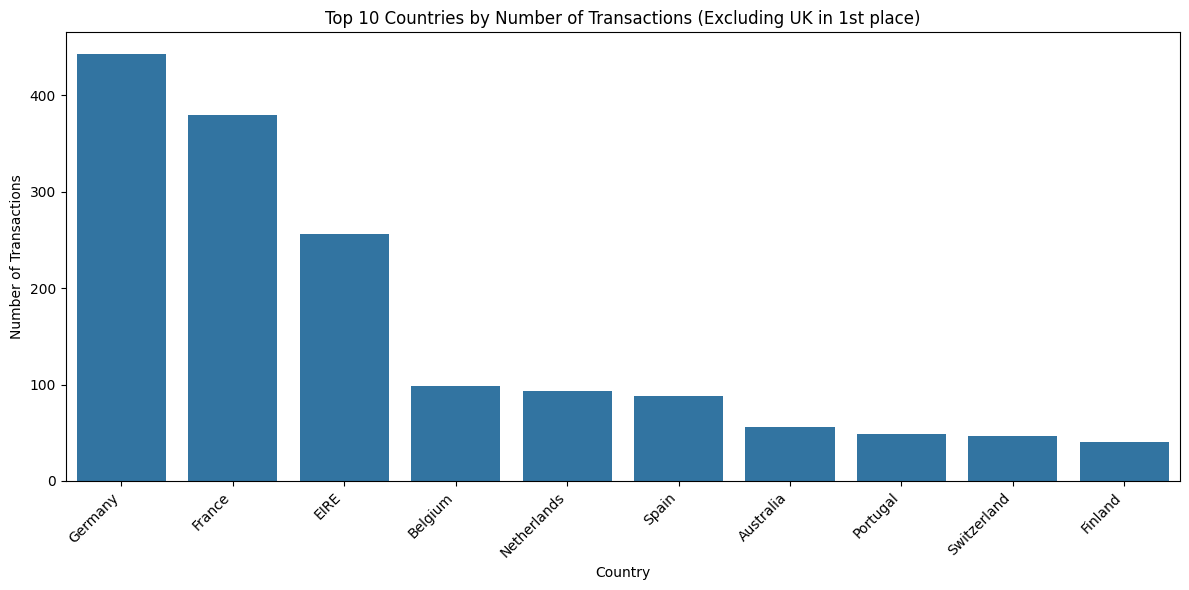

In [14]:
# analyzing the transaction volume by country
transaction_per_country = df.groupby('country')['invoice_num'].nunique().sort_values(ascending = False)
# Droping United knigdom as it has 16 thousand of invoice and other has very marginally low units of values
top_ten_country = transaction_per_country.drop('United Kingdom').head(10)
# visualzing the findings in chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_country.index, y=top_ten_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Countries by Number of Transactions (Excluding UK in 1st place)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
print('united Kingdom has 16k values as transaction values and other countries has values less than 500.\n this will skew the chart so i just removed the united knigdom from the chart just to make the chart more visually comprehensive')
plt.show()


### Analyzing the top selling products

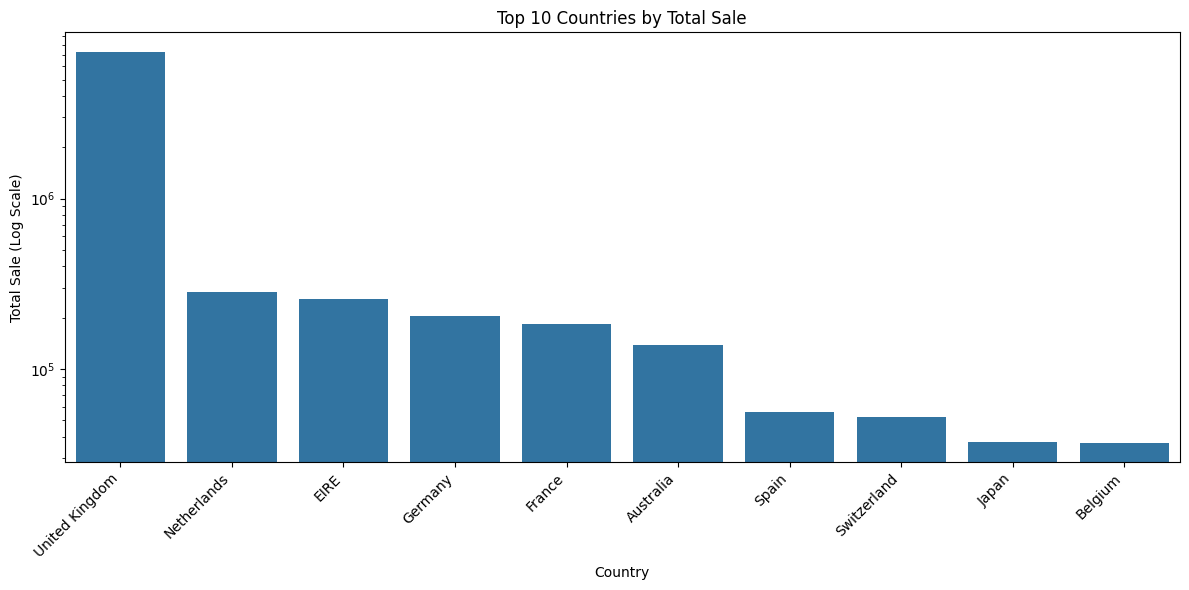

In [15]:
df['total_sale'] = df['quantity'] * df['unit_price']
top_prod = df.groupby('country')['total_sale'].sum().sort_values(ascending = False)
top_ten_prod = top_prod.head(10)

# visualizing the top ten products with log scale
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_prod.index, y=top_ten_prod.values)
plt.xlabel('Country')
plt.ylabel('Total Sale (Log Scale)')
plt.title('Top 10 Countries by Total Sale')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Analyzing Purchase Trend over Time

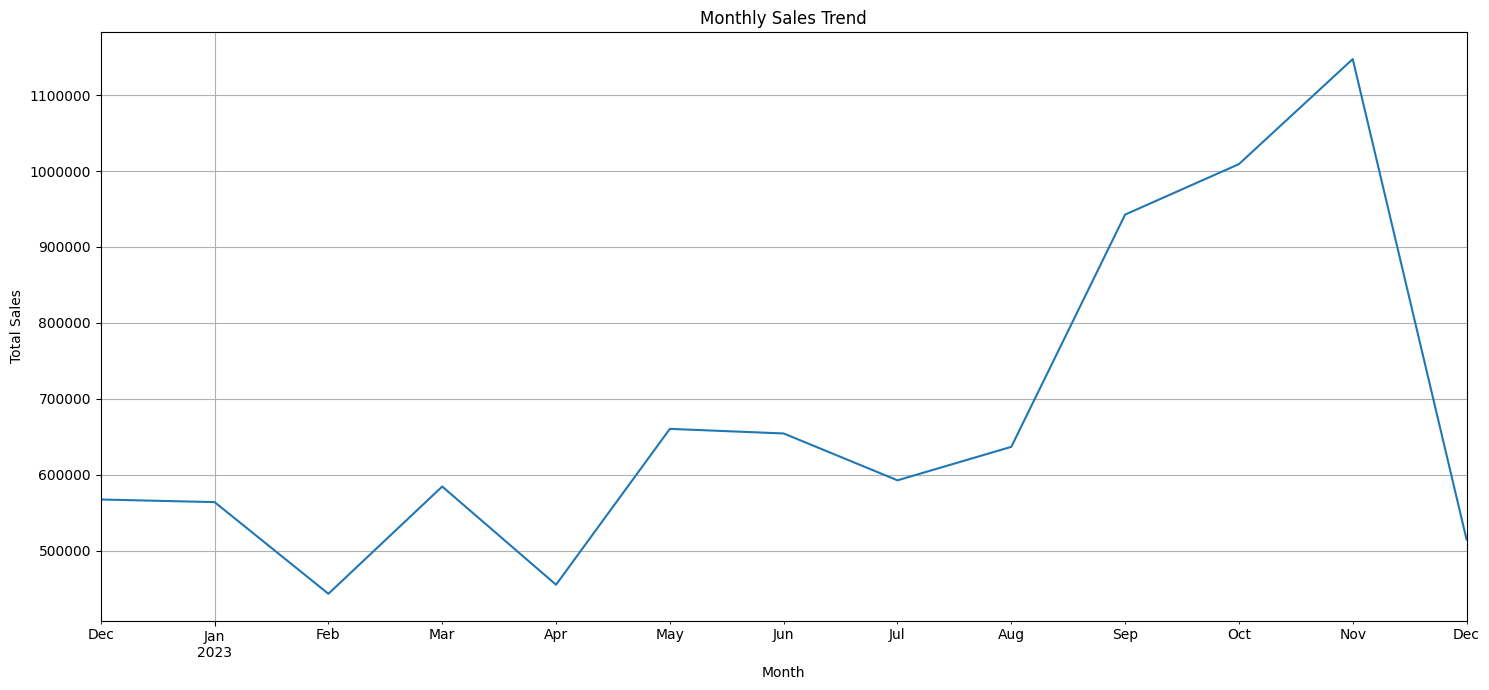

In [16]:

# Set 'invoice_date' as the index to perform time-series analysis
df_time = df.set_index('invoice_date')

# Resample the data by month and calculate the sum of 'total_sale' for each month
monthly_sales = df_time['total_sale'].resample('ME').sum()

# Plotting the monthly sales trend
plt.figure(figsize=(15, 7))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top selling products

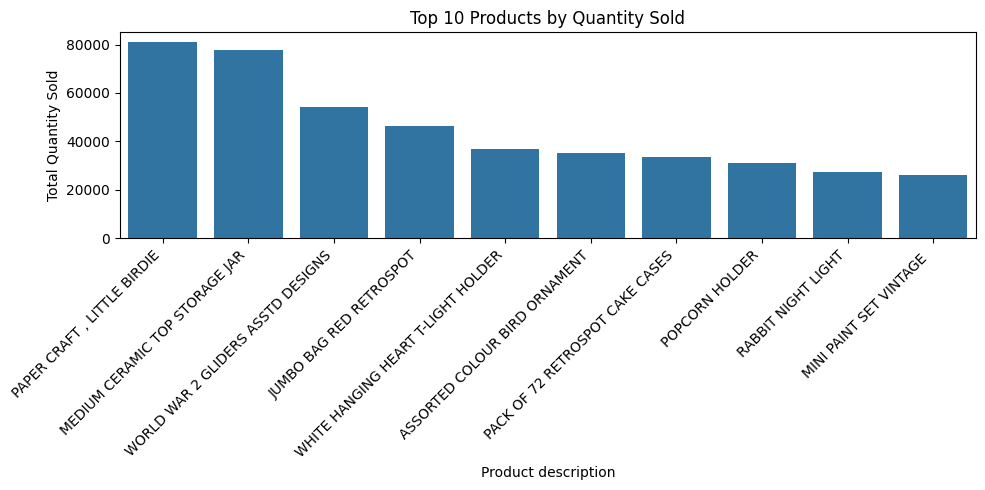

In [17]:
# analyzing top selling products by total number of quantities each product has sold
top_prod = df.groupby('description')['quantity'].sum().sort_values(ascending = False)
top_ten_prod = top_prod.head(10)

# visualizing the top selling product
plt.figure(figsize = (10,5))
sns.barplot(x = top_ten_prod.index, y = top_ten_prod.values)
plt.xlabel('Product description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation = 45,ha = 'right')
plt.tight_layout()
plt.show()

## STAGE 4: MODEL DEVELOPMENT

#### RFM ANALYSIS

In [18]:
# Calculate Recency
snapshot_date = df['invoice_date'].max() + pd.DateOffset(days=1)
df_rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (snapshot_date - x.max()).days,
    'invoice_num': 'nunique',
    'total_sale': 'sum'
})

# Rename the columns
df_rfm.rename(columns={'invoice_date': 'Recency',
                       'invoice_num': 'Frequency',
                       'total_sale': 'MonetaryValue'}, inplace=True)

df_rfm.reset_index(inplace = True)

# scaling the RFM columns using standardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_rfm[['Recency','Frequency','MonetaryValue']])
cust_id = df_rfm['customer_id']


#### ELBOW METHOD TO FIND THE VALUE OF K FOR CLUSTERING

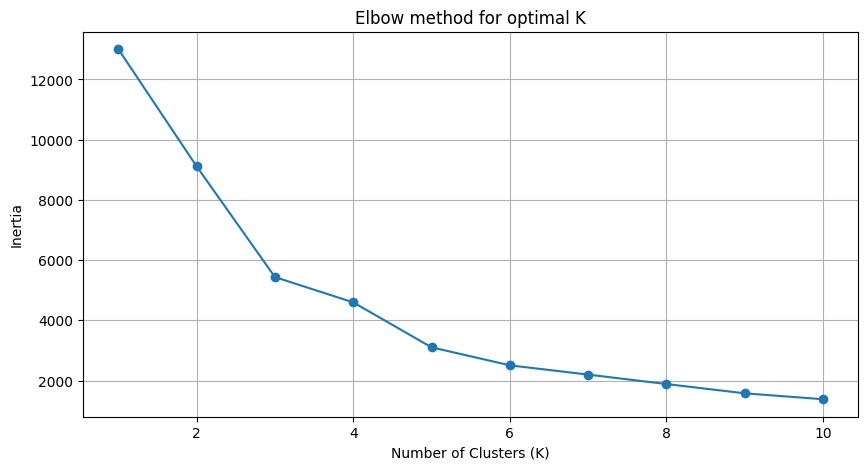

For k = 2, Silhouette Score = 0.9213
For k = 3, Silhouette Score = 0.5942
For k = 4, Silhouette Score = 0.5922
For k = 5, Silhouette Score = 0.6178
For k = 6, Silhouette Score = 0.5986
For k = 7, Silhouette Score = 0.4855
For k = 8, Silhouette Score = 0.5187
For k = 9, Silhouette Score = 0.5188
For k = 10, Silhouette Score = 0.3945


In [19]:
inertia = []
k_values = range(1,11)
for k in k_values:
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled_df)
  inertia.append(kmeans.inertia_)

# plotting the elbow curve to inspect
plt.figure(figsize = (10,5))
plt.plot(k_values,inertia,marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.grid(True)
plt.show()

# Evaluating Silhouette score for k at 3
x = scaled_df
sil_score = []
k_values = range(2,11)
for k in k_values:
  k_means = KMeans(n_clusters = k,random_state = 42)
  labels = k_means.fit_predict(x)
  sil_score.append(silhouette_score(x,labels))
  print(f'For k = {k}, Silhouette Score = {sil_score[-1]:.4f}')



#### MODEL IMPLEMENTATION

In [20]:
# Applying KMeans clustering at k equals to 3
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_df)
rfm_scaled_df = pd.DataFrame(scaled_df,columns = ['Recency','Frequency','MonetaryValue'])
rfm_scaled_df['cluster'] = kmeans.labels_
rfm_scaled_df['customer_id'] = cust_id.values
rfm_scaled_df.head()
rfm_scaled_df.head()

# calculating the cluster centers
cluster_centers = kmeans.cluster_centers_

# Turn into a DataFrame for better readability
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary'])
cluster_centers_df['Cluster'] = cluster_centers_df.index


# Inverse transform the centers
actual_centers = scaler.inverse_transform(cluster_centers)
final_rfm_df = scaler.inverse_transform(rfm_scaled_df[['Recency', 'Frequency', 'MonetaryValue']])
final_rfm_df = pd.DataFrame(final_rfm_df, columns=['Recency', 'Frequency', 'Monetary'])
final_rfm_df['cluster'] = rfm_scaled_df['cluster']
final_rfm_df['customer_id'] = rfm_scaled_df['customer_id']


actual_centers_df = pd.DataFrame(actual_centers, columns=['Recency', 'Frequency', 'Monetary'])
actual_centers_df['Cluster'] = actual_centers_df.index

# label those customers into respective category
cluster_category = {0: 'Potential Loyalists', 1: 'At Risk', 2: 'VIP'}
final_rfm_df['segment'] = final_rfm_df['cluster'].map(cluster_category)
final_rfm_df.head()

,Recency,Frequency,Monetary,cluster,customer_id,segment
0,326.0,1.0,77183.60,1,12346,At Risk
1,3.0,7.0,4310.00,0,12347,Potential Loyalists
2,76.0,4.0,1437.24,0,12348,Potential Loyalists
3,19.0,1.0,1457.55,0,12349,Potential Loyalists
4,311.0,1.0,294.40,1,12350,At Risk


In [21]:
# Checking the customer count in each segment
final_rfm_df.groupby('segment')['customer_id'].count()

,customer_id
segment,
At Risk,1086
Potential Loyalists,3223
VIP,26


In [22]:
# saving the model and the mapping for streamlit application
import joblib
import json

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the cluster label mapping
with open('cluster_mapping.json', 'w') as f:
    json.dump(cluster_category, f)

joblib.dump(scaler, 'scaler.pkl')  # Save the scaler you used



['scaler.pkl']

## Conclusion

This project successfully demonstrates a comprehensive, data-driven approach to understanding and acting upon customer behavior in an e-commerce environment. By leveraging a real-world transactional dataset, we have moved beyond simple descriptive analytics to build a robust customer segmentation model and a functional product recommendation system, which are integrated into a user-friendly Streamlit application.

**Key Findings and Implications:**

*   **Customer Segmentation:** Through RFM (Recency, Frequency, Monetary) analysis and K-Means clustering, we have successfully segmented the customer base into three distinct, actionable groups: 'Potential Loyalists,' 'At Risk,' and 'VIPs.' This segmentation provides a powerful framework for targeted marketing strategies. For example, 'At Risk' customers can be targeted with re-engagement campaigns, while 'VIPs' can be offered exclusive perks to foster loyalty. The 'Potential Loyalists' represent a significant opportunity for growth and can be nurtured into 'VIP' status with personalized offers and communication.

*   **Actionable Insights from EDA:** The exploratory data analysis revealed critical patterns in purchasing behavior. The dominance of the UK market in transaction volume and sales underscores its importance and suggests a need for geographically tailored marketing efforts. The identification of top-selling products provides valuable information for inventory management, cross-selling, and up-selling opportunities. The monthly sales trend analysis can inform a more dynamic pricing and promotional strategy, allowing the business to capitalize on seasonal peaks in demand.

*   **Operationalization through Streamlit:** The development of the Streamlit application is a crucial step in translating these analytical insights into tangible business value. The customer segmentation module allows for real-time classification of customers, enabling marketing teams to make informed decisions quickly. The product recommendation module enhances the customer experience by providing personalized suggestions, which can lead to increased conversion rates and average order value.

**Future Directions:**

*   **Advanced Recommendation Models:** While the current recommendation system is effective, future iterations could explore more advanced collaborative filtering techniques (e.g., matrix factorization with SVD) or content-based filtering to provide even more nuanced and accurate recommendations.
*   **Dynamic Segmentation:** The customer segments are not static. Future work could involve developing a system for dynamic re-segmentation of customers as their purchasing behavior evolves over time.
*   **Predictive Analytics:** The current analysis is primarily descriptive and diagnostic. The next logical step would be to build predictive models to forecast customer lifetime value (CLV), churn risk, and future sales trends.

In conclusion, this project provides a solid foundation for a data-driven e-commerce strategy. By combining rigorous data analysis with a practical application, we have created a powerful toolset that can help the business to better understand its customers, personalize their experience, and ultimately, drive sustainable growth.